<a href="https://colab.research.google.com/github/FreakyClone/AI-exams/blob/master/X_ray_images_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Dataset: http://cb.lk/covid_19

!wget http://cb.lk/covid_19

--2020-07-29 18:17:03--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-07-29 18:17:04--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-07-29 18:17:05--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-07-29 18:17:05--  https://www.dropbox.com/s/raw/7rjw

In [12]:
!unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
replace CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
replace CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
replace CovidDataset/Val/Covid/4-x-day1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: all
error:  invalid response [all]
replace CovidDataset/Val/Covid/4-x-day1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidData

In [13]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [15]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 64)       

In [17]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [20]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [23]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [66]:
#
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/15
10/10 [==============================] - 11s 1s/step - loss: 0.1665 - accuracy: 0.9563 - val_loss: 0.0730 - val_accuracy: 0.9667
Epoch 2/15
10/10 [==============================] - 11s 1s/step - loss: 0.1564 - accuracy: 0.9500 - val_loss: 0.0562 - val_accuracy: 0.9667
Epoch 3/15
10/10 [==============================] - 11s 1s/step - loss: 0.1347 - accuracy: 0.9594 - val_loss: 0.0819 - val_accuracy: 0.9667
Epoch 4/15
10/10 [==============================] - 11s 1s/step - loss: 0.0816 - accuracy: 0.9656 - val_loss: 0.0190 - val_accuracy: 0.9833
Epoch 5/15
10/10 [==============================] - 11s 1s/step - loss: 0.1335 - accuracy: 0.9625 - val_loss: 0.0601 - val_accuracy: 0.9667
Epoch 6/15
10/10 [==============================] - 11s 1s/step - loss: 0.0727 - accuracy: 0.9688 - val_loss: 0.0770 - val_accuracy: 0.9667
Epoch 7/15
10/10 [==============================] - 11s 1s/step - loss: 0.1168 - accuracy: 0.9563 - val_loss: 0.1426 - val_accuracy: 0.9667
Epoch 8/15
10/10 [==

In [ ]:
# Class Activation Maps (confusion matrix)

In [67]:
model.evaluate_generator(train_generator)

[0.03625362738966942, 0.9866071343421936]

In [68]:
model.evaluate_generator(validation_generator)

[0.01820816472172737, 0.9666666388511658]

In [69]:
#Test images
import os

In [70]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [71]:
y_actual = []
y_test = []

In [72]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [73]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [74]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
cm = confusion_matrix(y_actual, y_test)

In [77]:
import seaborn as sns

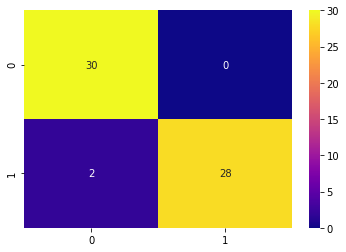

In [78]:
#Covid=0 , Normal=1
sns.heatmap(cm, cmap='plasma', annot=True)

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [65]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]

# The local path to our target image
img_path = keras.utils.get_file( "C:\\Users\\Freaky\\Desktop\\chestxray\\images"
)

display(Image(img_path))

TypeError: ignored